In [1]:
from sklearn.datasets import fetch_20newsgroups
twenty = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)
len(twenty.data)

18846

In [2]:
twenty.data[0:10]

["From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>\nSubject: Pens fans reactions\nOrganization: Post Office, Carnegie Mellon, Pittsburgh, PA\nLines: 12\nNNTP-Posting-Host: po4.andrew.cmu.edu\n\n\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n",
 'From: mblawson@midway.ecn.uoknor.edu (Matthew B Lawson)\nSubject: Which h

In [3]:
%matplotlib inline
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from scikeras.wrappers  import KerasClassifier

In [5]:
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [6]:
ENGLISH_STOP_WORDS

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [7]:
import nltk
from nltk.corpus import wordnet
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [8]:
twenty.data[0]

"From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>\nSubject: Pens fans reactions\nOrganization: Post Office, Carnegie Mellon, Pittsburgh, PA\nLines: 12\nNNTP-Posting-Host: po4.andrew.cmu.edu\n\n\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n"

In [9]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = word[1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)
    
class SimpleTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
        self.stopwords = set(ENGLISH_STOP_WORDS)
        self.lemmatizer = WordNetLemmatizer()


    def transform(self, x, fit=False):
        matrix = []
        i = 0;
        for sentence in x:
            tokens = self.tokenizer.tokenize(sentence.lower())
            tokens_tags = nltk.pos_tag(tokens)   
            tokens = [self.lemmatizer.lemmatize(item[0], get_wordnet_pos(item)) for item in tokens_tags \
                      if item[1] not in ['MD','IN', 'FW', 'EX','PDT','POS', 'PRP$','PRP', 'UH', 'WDT', 'WRB','WP','WP$']]  
            tokens = [word for word in tokens if word not in self.stopwords and len(word) > 1]
            
            matrix.append(tokens)
            
            if i % 50 == 0:
                print(i)
            i = i + 1
                              
        return matrix

In [10]:
tokenzier = SimpleTransformer()
tokens = tokenzier.transform(twenty.data)

0
50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750
4800
4850
4900
4950
5000
5050
5100
5150
5200
5250
5300
5350
5400
5450
5500
5550
5600
5650
5700
5750
5800
5850
5900
5950
6000
6050
6100
6150
6200
6250
6300
6350
6400
6450
6500
6550
6600
6650
6700
6750
6800
6850
6900
6950
7000
7050
7100
7150
7200
7250
7300
7350
7400
7450
7500
7550
7600
7650
7700
7750
7800
7850
7900
7950
8000
8050
8100
8150
8200
8250
8300
8350
8400
8450
8500
8550
8600
8650
8700
8750
8800
8850
8900
8950
9000
9050
9100
9150
9200
9250
9300
9350
9400
9450
9500
9550
9600
9650
9700
9750
9800
9850
9900
9950
10000
10050
10100
10150

In [11]:
from nltk import FreqDist
fdist = FreqDist(np.concatenate(tokens)) 
for word, frequency in fdist.most_common(2000):
    print(u'{};{}'.format(word, frequency))

ax;62450
edu;34915
line;21842
subject;20535
com;20221
organization;18951
write;14640
use;14134
article;12693
post;11901
say;11805
know;10940
don;9960
make;9878
think;9652
people;9561
university;9516
just;9370
host;8463
time;8248
good;7983
nntp;7065
new;6550
work;6497
year;6118
want;6025
right;5756
way;5640
need;5521
look;5519
thing;5465
come;5462
state;5423
problem;5369
god;5273
file;5010
max;4805
try;4771
world;4607
distribution;4575
question;4568
ve;4481
run;4412
reply;4365
window;4338
point;4256
10;4137
program;4106
believe;4054
drive;3988
computer;3941
tell;3885
help;3782
mean;3775
mail;3741
read;3720
day;3684
number;3640
really;3636
game;3589
include;3504
case;3318
win;3261
government;3259
start;3189
information;3177
key;3142
bit;3103
law;3065
ll;3037
group;3015
20;2988
support;2970
ask;2970
software;2962
let;2960
long;2947
news;2946
ac;2921
high;2892
version;2881
car;2856
space;2855
usa;2854
image;2819
15;2814
david;2803
sure;2767
fact;2761
thanks;2734
16;2723
uk;2695
set;2673
po

In [12]:
fdist.most_common(10_000)

[('ax', 62450),
 ('edu', 34915),
 ('line', 21842),
 ('subject', 20535),
 ('com', 20221),
 ('organization', 18951),
 ('write', 14640),
 ('use', 14134),
 ('article', 12693),
 ('post', 11901),
 ('say', 11805),
 ('know', 10940),
 ('don', 9960),
 ('make', 9878),
 ('think', 9652),
 ('people', 9561),
 ('university', 9516),
 ('just', 9370),
 ('host', 8463),
 ('time', 8248),
 ('good', 7983),
 ('nntp', 7065),
 ('new', 6550),
 ('work', 6497),
 ('year', 6118),
 ('want', 6025),
 ('right', 5756),
 ('way', 5640),
 ('need', 5521),
 ('look', 5519),
 ('thing', 5465),
 ('come', 5462),
 ('state', 5423),
 ('problem', 5369),
 ('god', 5273),
 ('file', 5010),
 ('max', 4805),
 ('try', 4771),
 ('world', 4607),
 ('distribution', 4575),
 ('question', 4568),
 ('ve', 4481),
 ('run', 4412),
 ('reply', 4365),
 ('window', 4338),
 ('point', 4256),
 ('10', 4137),
 ('program', 4106),
 ('believe', 4054),
 ('drive', 3988),
 ('computer', 3941),
 ('tell', 3885),
 ('help', 3782),
 ('mean', 3775),
 ('mail', 3741),
 ('read', 37

In [13]:
twenty.data[0]

"From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>\nSubject: Pens fans reactions\nOrganization: Post Office, Carnegie Mellon, Pittsburgh, PA\nLines: 12\nNNTP-Posting-Host: po4.andrew.cmu.edu\n\n\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n"

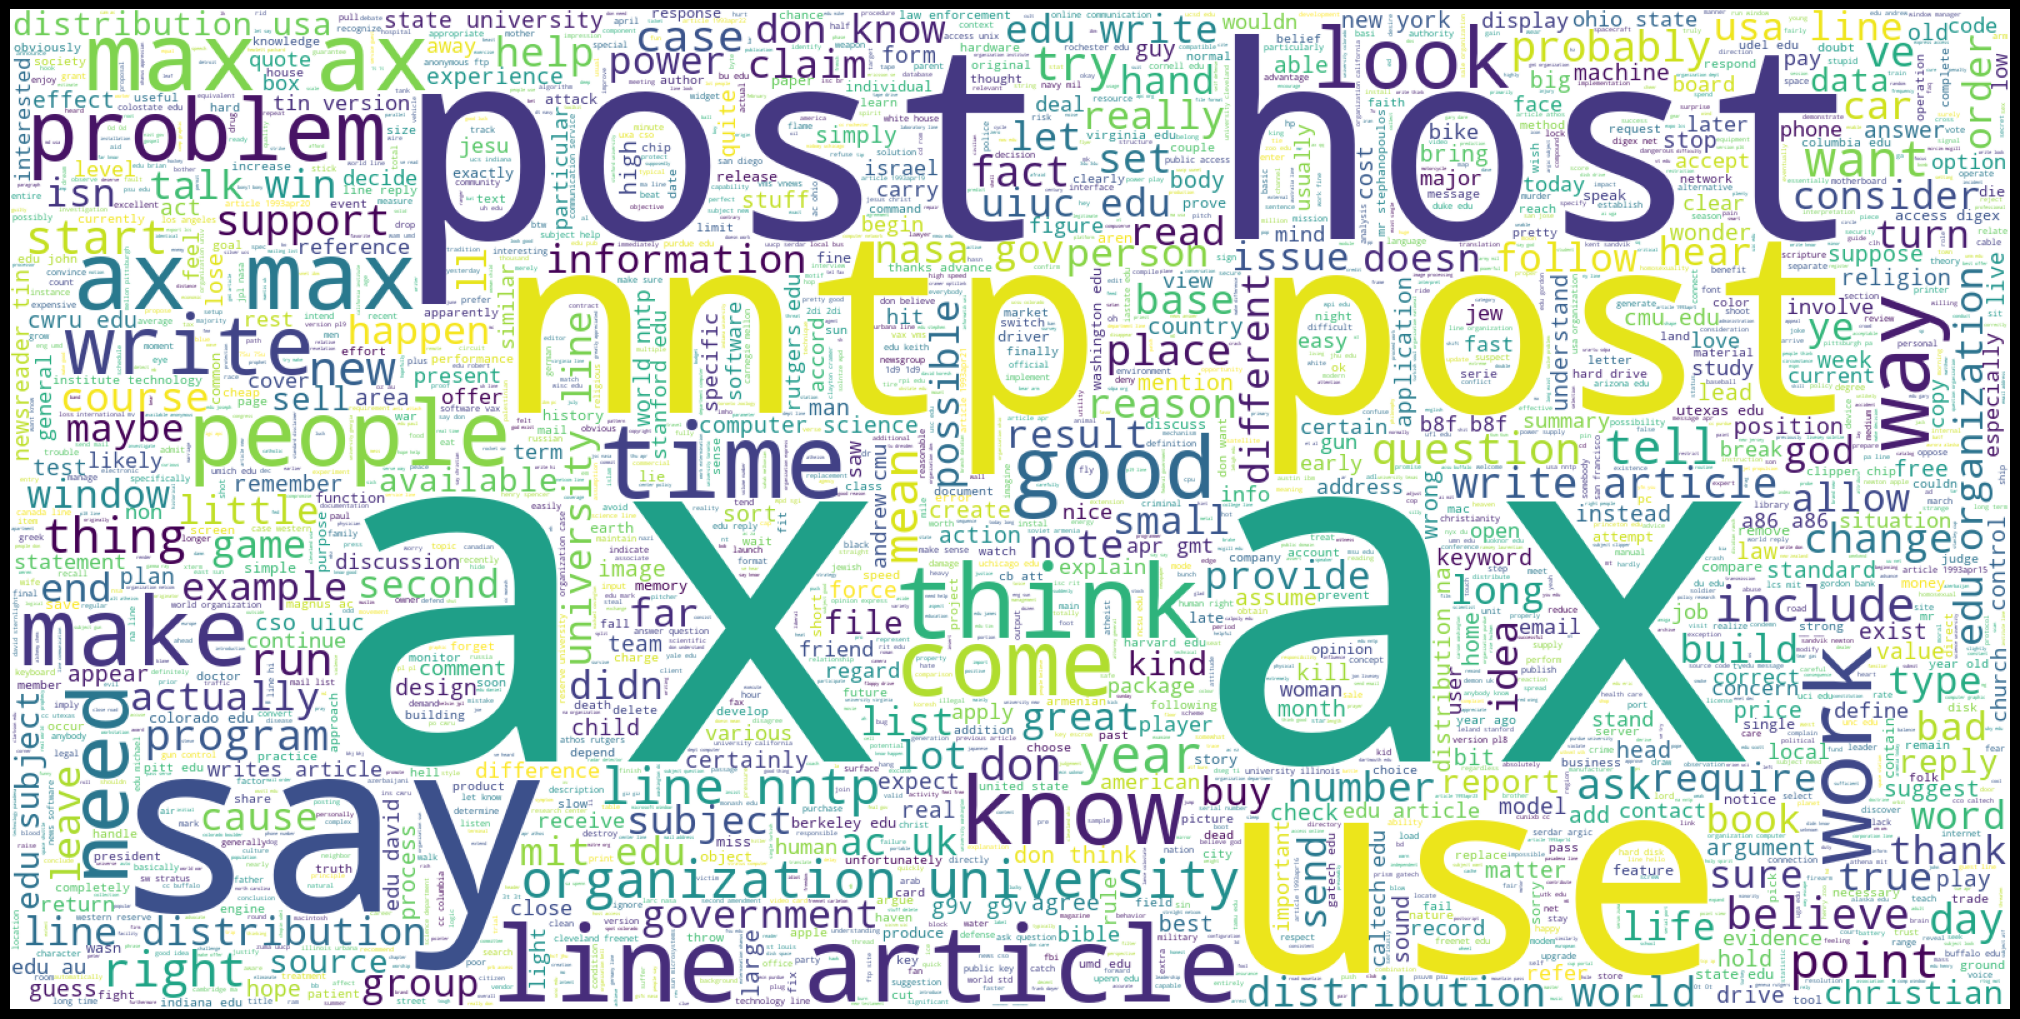

In [14]:
from wordcloud import WordCloud
# Join the different processed titles together.
flatten_list = [j for sub in tokens for j in sub]
long_string = ','.join(flatten_list)
# Create a WordCloud object
wordcloud = WordCloud(background_color="white",width=1600, height=800, max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [15]:
unique_words = set([j for sub in tokens for j in sub])
len(unique_words)

163090

In [16]:
pd.Series(twenty.target).value_counts()

10    999
15    997
8     996
9     994
11    991
7     990
13    990
5     988
14    987
2     985
12    984
3     982
6     975
1     973
4     963
17    940
16    910
0     799
18    775
19    628
Name: count, dtype: int64

In [17]:
import sklearn 
X, test, y, y_test = sklearn.model_selection.train_test_split(tokens, twenty.target, stratify=twenty.target, 
                                                              test_size=.15)

In [18]:
pd.Series(y).value_counts()

10    849
15    847
8     847
9     845
11    842
7     841
13    841
5     840
14    839
2     837
12    836
3     835
6     829
1     827
4     819
17    799
16    774
0     679
18    659
19    534
Name: count, dtype: int64

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=.01, max_df=.99, max_features=10_000, lowercase=False)
X2 = vectorizer.fit_transform([" ".join(x) for x in X])
X2.shape
test2 = vectorizer.transform([" ".join(x) for x in test])

In [20]:
X3 = pd.DataFrame(X2.toarray(), columns=vectorizer.get_feature_names_out())

In [21]:
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)
X3.head()

00  000   01   02   03   04   05   07   08   09        10  100  1000   11  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.078909  0.0   0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   0.0  0.0   

    12   13   14   15  150       16        17   18   19  1988  1990  1991  \
0  0.0  0.0  0.0  0.0  0.0  0.00000  0.115275  0.0  0.0   0.0   0.0   0.0   
1  0.0  0.0  0.0  0.0  0.0  0.00000  0.000000  0.0  0.0   0.0   0.0   0.0   
2  0.0  0.0  0.0  0.0  0.0  0.12373  0.000000  0.0  0.0   0.0   0.0   0.0   
3  0.0  0.0  0.0  0.0  0.0  0.00000  0.000000  0.0  0.0   0.0   0.0   0.0   
4  0.0  0.0  0.0  0.0  0.0  0.00000  0.000000  0.0  0.0   0.0   0.0   0.0   

   1992  1993  1993apr15  1993apr16  1993apr19  1993apr20  1993apr21  \
0   0.0   0.0        0.0        0.0        0.0        0.0        0.0   
1   0.0   0.0        0.0        0.0        0.0        0.0        0.0   
2   0.0   0.0        0.0        0.0        0.0        0.0        0.0   
3   0.0   0.0        0.0        0.0        0.0        0.0        0.0   
4   0.0   0.0        0.0        0.0        0.0        0.0        0.0   

   1993apr22  1993apr23  1st   20  200  2000   21   22   23   24  241   25  \
0        0.0        0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1        0.0        0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2        0.0        0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3        0.0        0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4        0.0        0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   250   26   27   28   29  2nd   30  300   31   32        33   34   35   36  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.279336  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0   

    37   38  386   39   3d  3rd   40  400  408   41   42   43   44   45   46  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    47   48  486   49   50  500   51   52   53   54   55   56   57   58   59  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

         60   61   64   65   66   70   71   72   75   80  800        81   85  \
0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.173071  0.0   
1  0.114281  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
2  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
3  0.297772  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   
4  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0   

    86   88   89   90   91   92   93   95  9760   99   __  ___  ____   ab  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   0.0  0.0 

In [22]:
X3.shape

(16019, 1772)

In [23]:
def build_model():  
    model = models.Sequential()
    model.add(layers.Dense(1753, activation='relu', input_shape=(X2.shape[1],)))
    model.add(layers.Dropout(.5))
    model.add(layers.Dense(600, activation='relu'))
    model.add(layers.Dropout(.5))
    #model.add(layers.Dense(200, activation='relu'))
    #model.add(layers.Dropout(.4))
    model.add(layers.Dense(20, activation='softmax'))
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[tf.metrics.Recall(), 'accuracy'])      
    return model
model = build_model()
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1753)              3108069   
                                                                 
 dropout (Dropout)           (None, 1753)              0         
                                                                 
 dense_1 (Dense)             (None, 600)               1052400   
                                                                 
 dropout_1 (Dropout)         (None, 600)               0         
                                                                 
 dense_2 (Dense)             (None, 20)                12020     
                                                                 
Total params: 4172489 (15.92 MB)
Trainable params: 4172489 (15.92 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
weights = dict([(i, r) for i, r in enumerate(sklearn.utils.class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y), y=y))])

In [25]:
from keras.utils import to_categorical
y_encoded = to_categorical(y)
y_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [26]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
model = KerasClassifier(build_fn=build_model, epochs=5, batch_size=32, verbose=1,)
#callbacks = [EarlyStopping(monitor='loss', patience=1,restore_best_weights=True)]
modelfit = model.fit(X2.toarray(), y_encoded, class_weight=weights)

C:\Users\cappr\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/5


501/501 [==============================] - 25s 48ms/step - loss: 1.1355 - recall_1: 0.5197 - accuracy: 0.6715
Epoch 2/5
501/501 [==============================] - 24s 47ms/step - loss: 0.4167 - recall_1: 0.8318 - accuracy: 0.8712
Epoch 3/5
501/501 [==============================] - 25s 50ms/step - loss: 0.2244 - recall_1: 0.9148 - accuracy: 0.9321
Epoch 4/5
501/501 [==============================] - 25s 49ms/step - loss: 0.1261 - recall_1: 0.9531 - accuracy: 0.9619
Epoch 5/5
501/501 [==============================] - 24s 48ms/step - loss: 0.0694 - recall_1: 0.9770 - accuracy: 0.9810


In [28]:
predictedp = model.predict_proba(test2.toarray())
predicted = model.predict(test2.toarray())
print(predicted.shape)
predicted= np.argmax(predicted, axis=1)

89/89 [==============================] - 0s 4ms/step
(2827, 20)


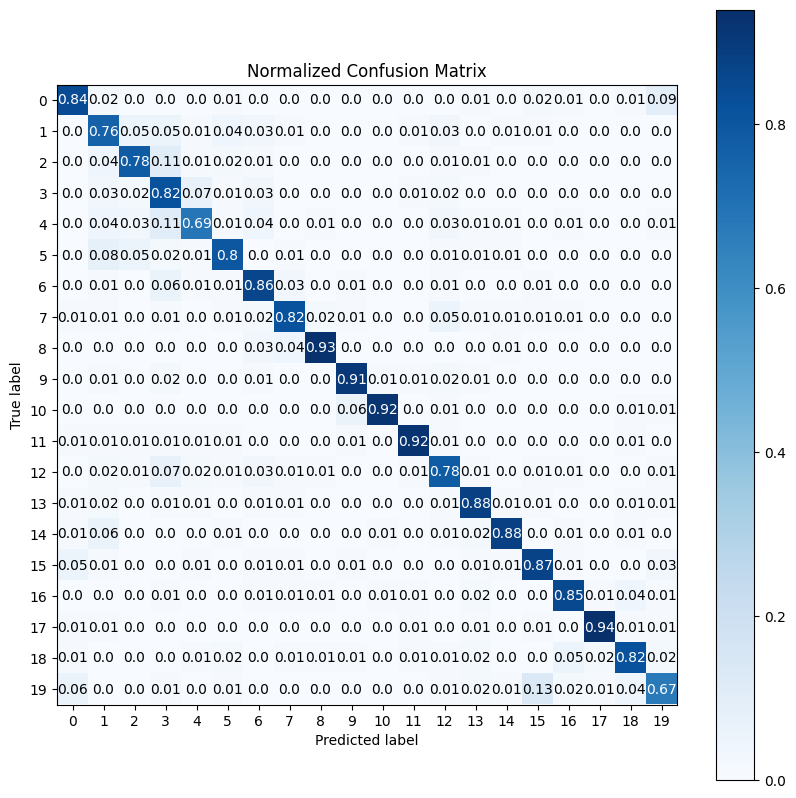

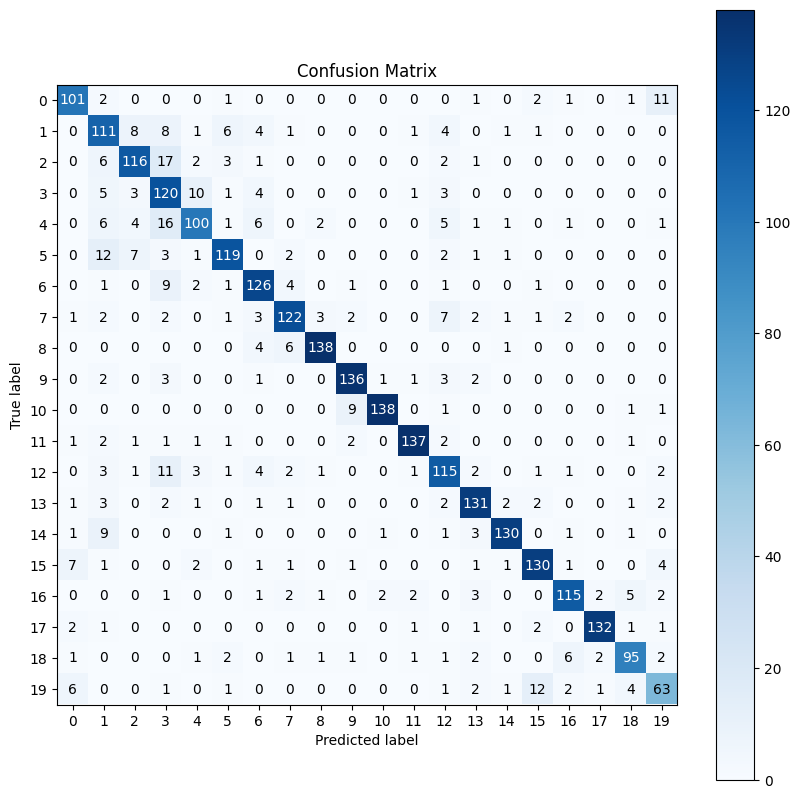

0.8401131941987973
0.8434769881920513
0.836647389652561
0.8386857666486588


C:\Users\cappr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:95: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


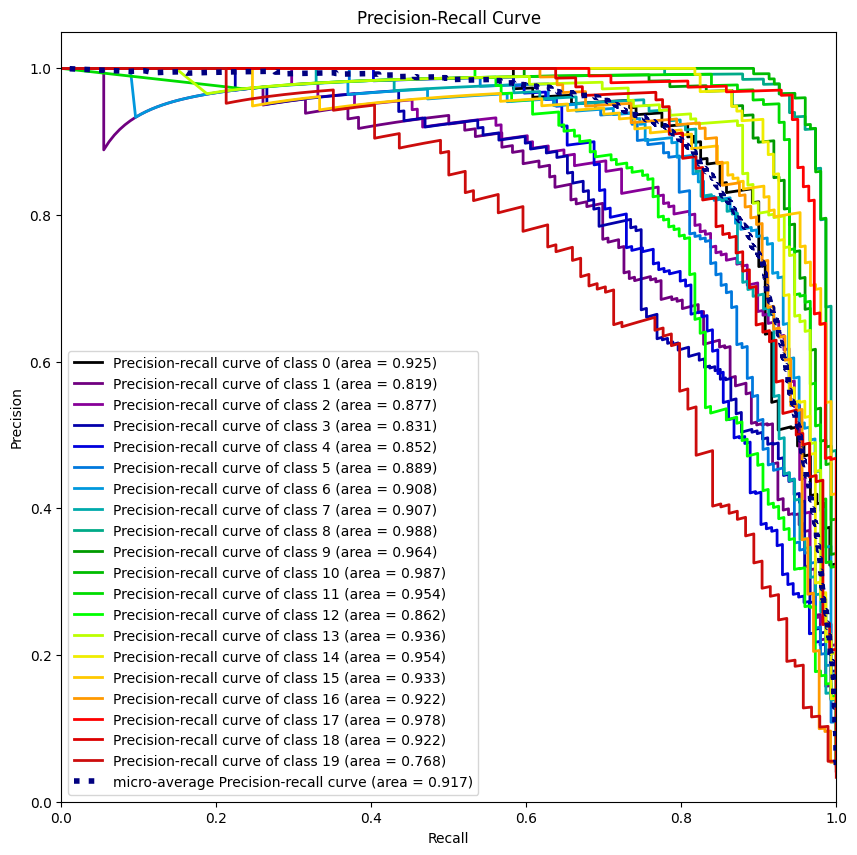

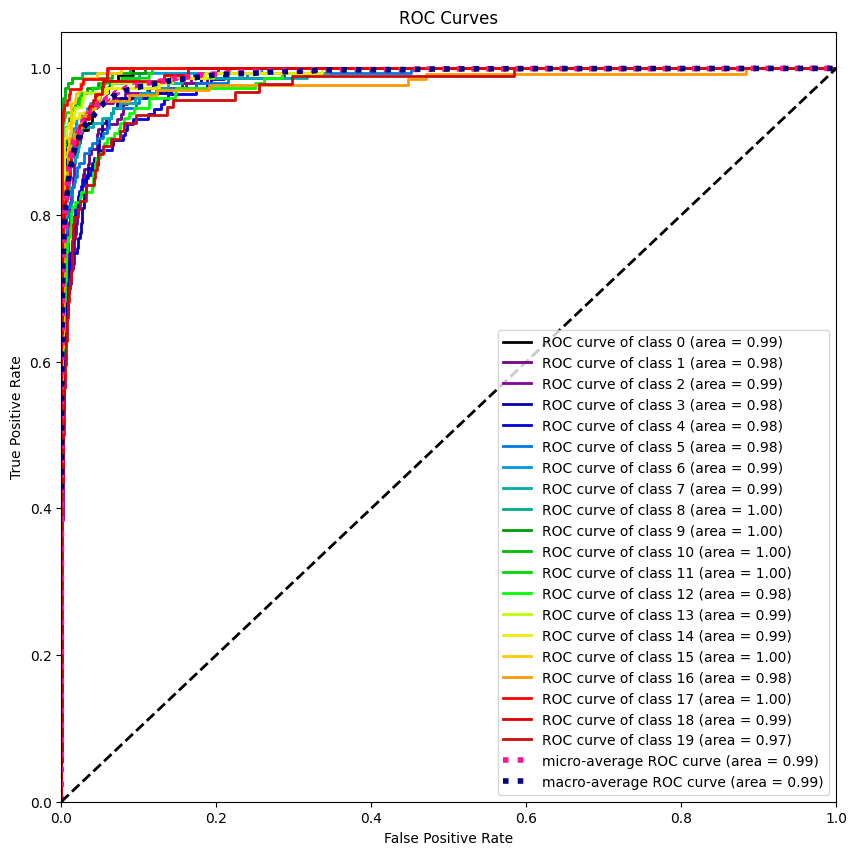

In [29]:
import scikitplot as skplt
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
plt.rcParams['figure.figsize'] = [10, 10]
       
skplt.metrics.plot_confusion_matrix(y_test, predicted, normalize=True)
plt.show()
skplt.metrics.plot_confusion_matrix(y_test, predicted, normalize=False)
plt.show()

print(accuracy_score(y_test, predicted))
print(precision_score(y_test, predicted, average='macro'))
print(recall_score(y_test, predicted,average='macro'))
print(f1_score(y_test, predicted,average='macro'))

skplt.metrics.plot_precision_recall_curve(y_test, predictedp)

skplt.metrics.plot_roc(y_test,predictedp)
plt.show()